<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### CatBoost Classifier With Normalization

This Code template is for the Classification task using CatBoostClassifier. Before training the actual model, the training and test set will be normalized using Normalize function from the sci-kit learn library.

## Required Packages

In [ ]:
!pip install catboost

In [18]:
import numpy as np
import pandas as pd
import seaborn as se
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.metrics import classification_report,plot_confusion_matrix
warnings.filterwarnings('ignore')

## Initialization

Filepath of CSV file

In [6]:
#filepath
file_path=""

List of features which are required for model training 

In [7]:
#x_values
features=[]

Target feature for prediction

In [8]:
#y_value
target=''

## Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [9]:
df=pd.read_csv(file_path)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [10]:
X=df[features]
Y=df[target]

## Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes

In [11]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

Calling preprocessing functions on the feature and target set.

In [12]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

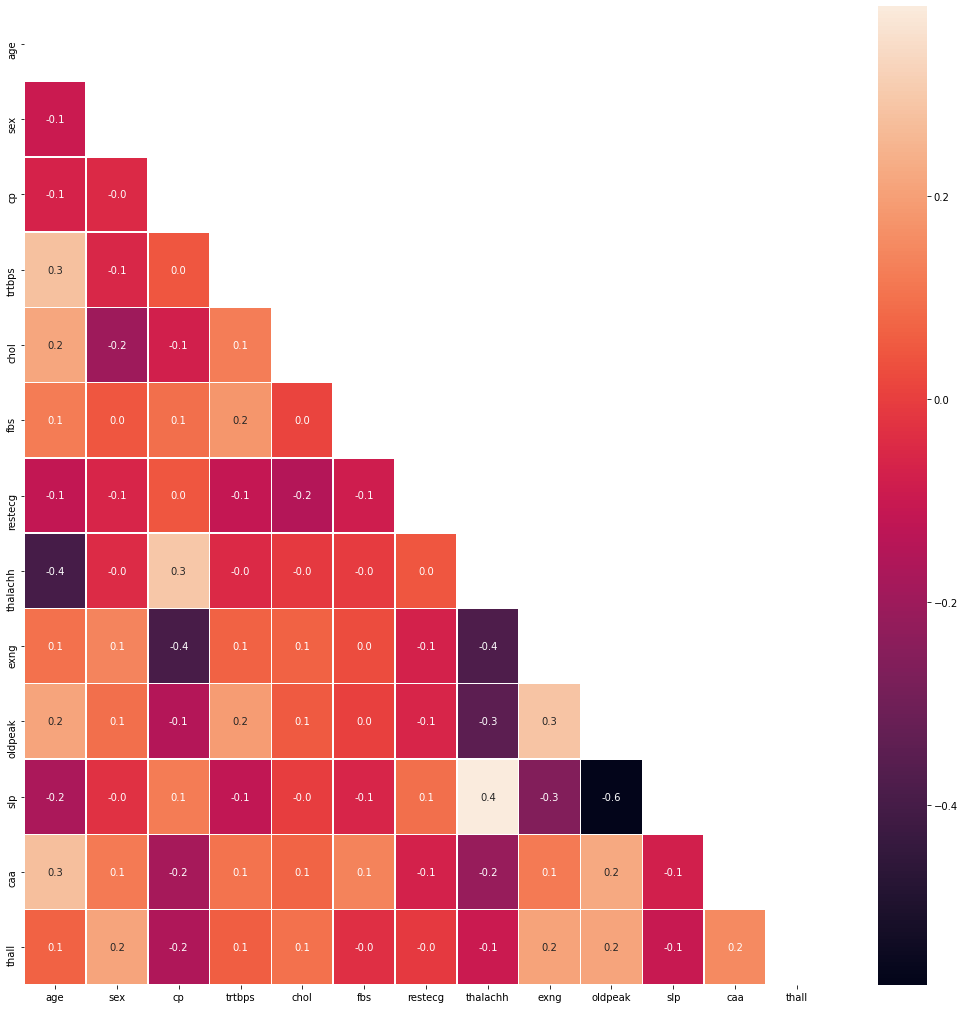

In [13]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

## Distribution Of Target Variable

<AxesSubplot:xlabel='output', ylabel='count'>

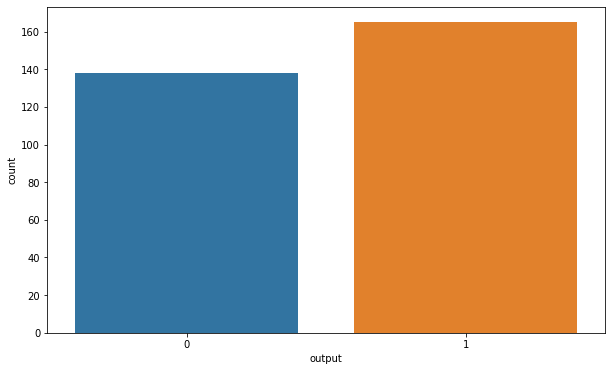

In [14]:
plt.figure(figsize = (10,6))
se.countplot(Y)

## Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

## Handling Target Imbalance

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class.We will perform overspampling using imblearn library.

In [16]:
x_train,y_train = RandomOverSampler(random_state=123).fit_resample(x_train, y_train)

## Data Rescaling
For rescaling the data **Normalizer** function of Sklearn is used.

Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

The function normalize provides a quick and easy way to scale input vectors individually to unit norm (vector length).

In [19]:
scaler = Normalizer()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Model

CatBoost is an algorithm for gradient boosting on decision trees. Developed by Yandex researchers and engineers, it is the successor of the MatrixNet algorithm that is widely used within the company for ranking tasks, forecasting and making recommendations.

Model Tuning Parameters
> **learning_rate  ->** it is defined automatically for Logloss, MultiClass & RMSE loss functions depending on the number of iterations if none of these parameters is set.The learning rate is used for reducing the gradient step.

> **l2_leaf_reg  ->**  Coefficient at the L2 regularization term of the cost function. Any positive value is allowed.

> **bootstrap_type  ->** Defines the method for sampling the weights of objects.

> **subsample  ->** Sample rate for bagging. This parameter can be used if one of the following bootstrap types is selected:

 > * Poisson
 > * Bernoulli
 > * MVS

For more info: [API](https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html)

In [20]:
model=CatBoostClassifier()
model.fit(x_train,y_train)

Learning rate set to 0.005871
0:	learn: 0.6885826	total: 164ms	remaining: 2m 43s
1:	learn: 0.6832932	total: 172ms	remaining: 1m 25s
2:	learn: 0.6776636	total: 180ms	remaining: 59.8s
3:	learn: 0.6725777	total: 190ms	remaining: 47.4s
4:	learn: 0.6692601	total: 197ms	remaining: 39.3s
5:	learn: 0.6651132	total: 205ms	remaining: 34s
6:	learn: 0.6598539	total: 214ms	remaining: 30.3s
7:	learn: 0.6544541	total: 221ms	remaining: 27.5s
8:	learn: 0.6494097	total: 230ms	remaining: 25.3s
9:	learn: 0.6444255	total: 237ms	remaining: 23.5s
10:	learn: 0.6395107	total: 244ms	remaining: 21.9s
11:	learn: 0.6352424	total: 251ms	remaining: 20.7s
12:	learn: 0.6308595	total: 258ms	remaining: 19.6s
13:	learn: 0.6265141	total: 266ms	remaining: 18.7s
14:	learn: 0.6219707	total: 273ms	remaining: 17.9s
15:	learn: 0.6170464	total: 280ms	remaining: 17.2s
16:	learn: 0.6127713	total: 288ms	remaining: 16.6s
17:	learn: 0.6085055	total: 295ms	remaining: 16.1s
18:	learn: 0.6041428	total: 302ms	remaining: 15.6s
19:	learn: 

182:	learn: 0.2857794	total: 1.16s	remaining: 5.17s
183:	learn: 0.2850430	total: 1.16s	remaining: 5.16s
184:	learn: 0.2839811	total: 1.17s	remaining: 5.14s
185:	learn: 0.2830901	total: 1.17s	remaining: 5.13s
186:	learn: 0.2818634	total: 1.18s	remaining: 5.12s
187:	learn: 0.2810079	total: 1.18s	remaining: 5.1s
188:	learn: 0.2802105	total: 1.19s	remaining: 5.09s
189:	learn: 0.2794170	total: 1.19s	remaining: 5.08s
190:	learn: 0.2785341	total: 1.2s	remaining: 5.07s
191:	learn: 0.2777624	total: 1.2s	remaining: 5.05s
192:	learn: 0.2769506	total: 1.21s	remaining: 5.04s
193:	learn: 0.2758840	total: 1.21s	remaining: 5.03s
194:	learn: 0.2750531	total: 1.22s	remaining: 5.02s
195:	learn: 0.2745691	total: 1.22s	remaining: 5.02s
196:	learn: 0.2740207	total: 1.23s	remaining: 5.02s
197:	learn: 0.2734308	total: 1.24s	remaining: 5.02s
198:	learn: 0.2727148	total: 1.25s	remaining: 5.01s
199:	learn: 0.2720626	total: 1.25s	remaining: 5s
200:	learn: 0.2712631	total: 1.25s	remaining: 4.99s
201:	learn: 0.2703

343:	learn: 0.1910312	total: 1.97s	remaining: 3.75s
344:	learn: 0.1904689	total: 1.97s	remaining: 3.74s
345:	learn: 0.1900872	total: 1.98s	remaining: 3.74s
346:	learn: 0.1896667	total: 1.98s	remaining: 3.73s
347:	learn: 0.1892643	total: 1.99s	remaining: 3.73s
348:	learn: 0.1889333	total: 1.99s	remaining: 3.72s
349:	learn: 0.1885847	total: 2s	remaining: 3.71s
350:	learn: 0.1884043	total: 2s	remaining: 3.7s
351:	learn: 0.1880149	total: 2.01s	remaining: 3.7s
352:	learn: 0.1877299	total: 2.01s	remaining: 3.69s
353:	learn: 0.1871822	total: 2.02s	remaining: 3.68s
354:	learn: 0.1868489	total: 2.02s	remaining: 3.67s
355:	learn: 0.1865813	total: 2.03s	remaining: 3.67s
356:	learn: 0.1861666	total: 2.03s	remaining: 3.66s
357:	learn: 0.1855686	total: 2.04s	remaining: 3.65s
358:	learn: 0.1852680	total: 2.04s	remaining: 3.65s
359:	learn: 0.1849127	total: 2.05s	remaining: 3.64s
360:	learn: 0.1845235	total: 2.05s	remaining: 3.63s
361:	learn: 0.1840939	total: 2.06s	remaining: 3.63s
362:	learn: 0.183733

510:	learn: 0.1420924	total: 2.77s	remaining: 2.65s
511:	learn: 0.1419833	total: 2.77s	remaining: 2.64s
512:	learn: 0.1417236	total: 2.78s	remaining: 2.64s
513:	learn: 0.1415241	total: 2.78s	remaining: 2.63s
514:	learn: 0.1412954	total: 2.79s	remaining: 2.63s
515:	learn: 0.1410615	total: 2.79s	remaining: 2.62s
516:	learn: 0.1407821	total: 2.8s	remaining: 2.61s
517:	learn: 0.1405654	total: 2.8s	remaining: 2.61s
518:	learn: 0.1402882	total: 2.81s	remaining: 2.6s
519:	learn: 0.1400158	total: 2.81s	remaining: 2.6s
520:	learn: 0.1398872	total: 2.82s	remaining: 2.59s
521:	learn: 0.1396165	total: 2.82s	remaining: 2.58s
522:	learn: 0.1394234	total: 2.83s	remaining: 2.58s
523:	learn: 0.1391602	total: 2.83s	remaining: 2.57s
524:	learn: 0.1390379	total: 2.83s	remaining: 2.56s
525:	learn: 0.1388339	total: 2.84s	remaining: 2.56s
526:	learn: 0.1385386	total: 2.84s	remaining: 2.55s
527:	learn: 0.1383816	total: 2.85s	remaining: 2.55s
528:	learn: 0.1381320	total: 2.85s	remaining: 2.54s
529:	learn: 0.13

687:	learn: 0.1095777	total: 3.57s	remaining: 1.62s
688:	learn: 0.1092914	total: 3.58s	remaining: 1.61s
689:	learn: 0.1091663	total: 3.58s	remaining: 1.61s
690:	learn: 0.1090538	total: 3.59s	remaining: 1.6s
691:	learn: 0.1088897	total: 3.59s	remaining: 1.6s
692:	learn: 0.1087542	total: 3.6s	remaining: 1.59s
693:	learn: 0.1086649	total: 3.6s	remaining: 1.59s
694:	learn: 0.1084982	total: 3.61s	remaining: 1.58s
695:	learn: 0.1082951	total: 3.61s	remaining: 1.58s
696:	learn: 0.1081514	total: 3.62s	remaining: 1.57s
697:	learn: 0.1079813	total: 3.62s	remaining: 1.57s
698:	learn: 0.1077492	total: 3.63s	remaining: 1.56s
699:	learn: 0.1075445	total: 3.63s	remaining: 1.56s
700:	learn: 0.1073993	total: 3.64s	remaining: 1.55s
701:	learn: 0.1072724	total: 3.64s	remaining: 1.55s
702:	learn: 0.1071236	total: 3.65s	remaining: 1.54s
703:	learn: 0.1069606	total: 3.65s	remaining: 1.53s
704:	learn: 0.1068234	total: 3.66s	remaining: 1.53s
705:	learn: 0.1066560	total: 3.66s	remaining: 1.52s
706:	learn: 0.10

859:	learn: 0.0856595	total: 4.38s	remaining: 713ms
860:	learn: 0.0855311	total: 4.38s	remaining: 708ms
861:	learn: 0.0853881	total: 4.39s	remaining: 703ms
862:	learn: 0.0853038	total: 4.39s	remaining: 698ms
863:	learn: 0.0851266	total: 4.4s	remaining: 692ms
864:	learn: 0.0850741	total: 4.4s	remaining: 687ms
865:	learn: 0.0849149	total: 4.41s	remaining: 682ms
866:	learn: 0.0847680	total: 4.41s	remaining: 677ms
867:	learn: 0.0846401	total: 4.42s	remaining: 672ms
868:	learn: 0.0845178	total: 4.42s	remaining: 666ms
869:	learn: 0.0844564	total: 4.42s	remaining: 661ms
870:	learn: 0.0842836	total: 4.43s	remaining: 656ms
871:	learn: 0.0841646	total: 4.43s	remaining: 651ms
872:	learn: 0.0839779	total: 4.44s	remaining: 646ms
873:	learn: 0.0838851	total: 4.44s	remaining: 641ms
874:	learn: 0.0837810	total: 4.45s	remaining: 636ms
875:	learn: 0.0836511	total: 4.45s	remaining: 631ms
876:	learn: 0.0835448	total: 4.46s	remaining: 625ms
877:	learn: 0.0833426	total: 4.46s	remaining: 620ms
878:	learn: 0.

## Model Accuracy

score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [21]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 77.05 %



## Confusion Matrix

A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

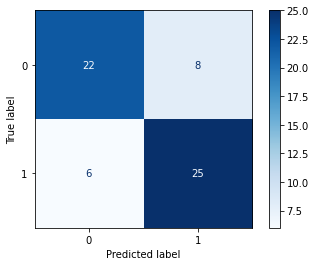

In [22]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)

## Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

where:
- Precision:- Accuracy of positive predictions.
- Recall:- Fraction of positives that were correctly identified.
- f1-score:-  percent of positive predictions were correct
- support:- Support is the number of actual occurrences of the class in the specified dataset.

In [23]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



#### Creator:Shreepad Nade , Github: [Profile](https://github.com/shreepad-nade)
